In [123]:
!pip install catboost

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np
from typing import Dict

In [126]:
def add_code(df:pd.DataFrame, d_code:Dict[int, Dict[str,int]], h_code:Dict[int, Dict[str, int]], l_code:Dict[int, Dict[str, int]])->pd.DataFrame:
    df = df.copy()

    # D code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x:d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x:d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x:d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x:d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 대분류코드'])    

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x:d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x:d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x:d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x:d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x:d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x:d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x:d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x:d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x:d_code[x]['속성 D 대분류코드'])

    # H code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    return df

In [127]:
d_code = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/속성_L_코드.csv', index_col=0).T.to_dict()

In [128]:
train = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/train.csv')
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


In [129]:
test = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/test.csv')
test

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,1,1,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26
46400,46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,1,1,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25
46401,46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,1,1,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09
46402,46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,1,1,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34


In [130]:
train = add_code(train, d_code, h_code, l_code)
test = add_code(test, d_code, h_code, l_code)

### 속성 D 대분류 매칭 여부


In [131]:
print('Train:', np.mean(train['d_l_match_yn'] == (train['person_prefer_d_1_l'] == train['contents_attribute_d_l'])))
print('Test:', np.mean(test['d_l_match_yn'] == (test['person_prefer_d_1_l'] == test['contents_attribute_d_l'])))

Train: 1.0
Test: 1.0


### 속성 D 세분류 매칭 여부

In [132]:
print('Train:', np.mean(train['d_m_match_yn'] == (train['person_prefer_d_1_n'] == train['contents_attribute_d_n'])))
print('Test:', np.mean(test['d_m_match_yn'] == (test['person_prefer_d_1_n'] == test['contents_attribute_d_n'])))

Train: 1.0
Test: 1.0


### 속성 D 코드 매칭 여부

In [133]:
print('Train:', np.mean(train['d_s_match_yn'] == (train['person_prefer_d_1'] == train['contents_attribute_d'])))
print('Test:', np.mean(test['d_s_match_yn'] == (test['person_prefer_d_1'] == test['contents_attribute_d'])))

Train: 1.0
Test: 1.0


### 속성 H 대분류 매칭 여부

In [134]:
print('Train:', np.mean(train['h_l_match_yn'] == (train['person_prefer_h_1_l'] == train['contents_attribute_h_l'])))
print('Test:', np.mean(test['h_l_match_yn'] == (test['person_prefer_h_1_l'] == test['contents_attribute_h_l'])))

Train: 1.0
Test: 1.0


### 속성 H 중분류 매칭 여부

In [135]:
print('Train:', np.mean(train['h_m_match_yn'] == (train['person_prefer_h_1_m'] == train['contents_attribute_h_m'])))
print('Test:', np.mean(test['h_m_match_yn'] == (test['person_prefer_h_1_m'] == test['contents_attribute_h_m'])))

Train: 1.0
Test: 1.0


### 속성 H 코드 매칭 여부

In [136]:
print('Train:', np.mean(train['h_s_match_yn'] == (train['person_prefer_h_1'] == train['contents_attribute_h'])))
print('Test:', np.mean(test['h_s_match_yn'] == (test['person_prefer_h_1'] == test['contents_attribute_h'])))

Train: 1.0
Test: 1.0


In [137]:
all_data = pd.concat([train,test])
all_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1.0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,2016,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0.0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,2016,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0.0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,2016,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0.0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,2016,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0.0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,2016,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,1,1,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26,NaN,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,2006,759,759,2006
46400,46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,1,1,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25,NaN,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,2006,759,759,2006
46401,46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,1,1,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09,NaN,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,2006,759,759,2006
46402,46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,1,1,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34,NaN,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,2006,759,759,2006


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.close('all')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


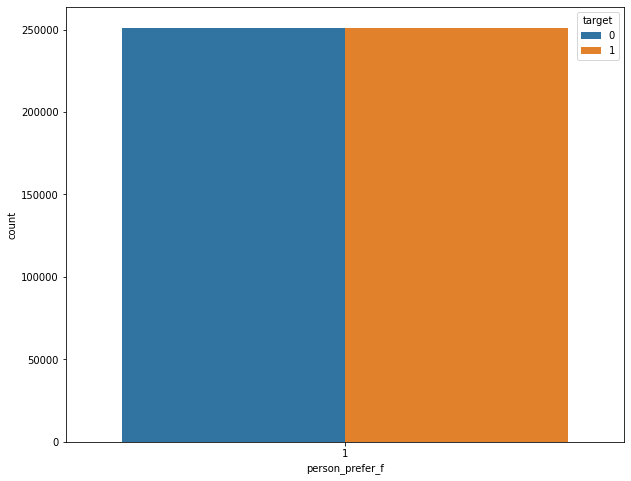

In [139]:
plt.figure(figsize=(10,8))
sns.countplot(train['person_prefer_f'], hue=train['target'])

In [140]:
all_data['contents_open_dt'] = pd.to_datetime(all_data['contents_open_dt'])
all_data['year'] = all_data['contents_open_dt'].dt.year
all_data['month'] = all_data['contents_open_dt'].dt.month
all_data['day'] = all_data['contents_open_dt'].dt.day
all_data['hour'] = all_data['contents_open_dt'].dt.hour
all_data['minute'] = all_data['contents_open_dt'].dt.minute

In [141]:
all_data_2 = all_data.drop(columns=['target', 'contents_open_dt', 'id', 'year'])
all_data_2

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,month,day,hour,minute
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,2016,1606,1605,2016,1,17,12,9
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,2016,1606,1605,2016,6,18,17,48
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,2016,1595,1572,2016,7,8,20,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,2016,1606,1605,2016,1,13,18,9
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,2016,1606,1605,2016,3,9,20,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,1,1,2,4,95,3,3,5,1,1,2,759,147,1,5,91,425040,726084,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,2006,759,759,2006,12,17,1,6
46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,1,1,86,31,278,3,3,10,2,1,2,759,147,1,4,91,290061,156948,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,2006,759,759,2006,12,29,21,57
46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,1,1,288,279,278,3,3,10,2,1,2,759,147,1,4,288,307951,175069,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,2006,759,759,2006,12,10,19,9
46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,1,1,288,279,278,3,1,5,1,3,2,759,147,1,5,288,308354,174849,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,2006,759,759,2006,12,7,14,4


In [142]:
train_2 = all_data_2[:len(train)]
test_2 = all_data_2[len(train):]

In [143]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_2, train['target'], test_size=0.2, random_state=42, stratify=train['target'])
x_val

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,month,day,hour,minute
315154,True,False,False,True,False,False,2,0,2,5,112,113,120,0,1,1,56,51,53,1,3,10,2,1,2,1110,114,1,3,50,357128,227122,110,109,56,1,110,109,56,1,114,109,56,1,114,109,56,1,48,366,48,361,48,363,48,360,2010,1097,1021,2010,7,8,11,11
19047,False,False,False,True,True,True,1,6,2,1,981,968,969,6,1,1,43,41,46,2,1,10,2,3,2,985,236,1,5,43,205645,114614,968,961,927,926,968,961,927,926,968,961,927,926,234,232,231,216,30,354,30,352,30,357,30,354,2009,980,954,2009,8,13,11,56
61745,True,False,False,True,False,False,1,5,2,1,102,181,95,0,1,1,31,278,86,1,1,5,1,1,2,875,114,4,3,34,138689,81436,101,91,56,1,175,152,56,1,92,91,56,1,114,109,56,1,30,342,277,542,85,391,30,345,2007,870,869,2007,7,20,14,33
303985,True,True,False,True,False,False,1,1,3,1,118,113,110,5,1,1,170,171,79,3,3,10,2,1,1,1002,117,5,3,175,973840,683087,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,169,451,169,452,78,385,169,452,2009,1000,954,2009,1,21,22,29
15214,False,False,False,True,False,False,2,0,3,5,955,363,1085,4,1,1,86,31,278,3,3,3,1,1,2,1571,719,4,3,88,282916,156620,955,951,927,926,361,359,297,216,1085,1083,1053,926,718,717,716,618,85,391,30,342,277,542,85,393,2016,1568,1556,2016,11,10,19,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25593,False,False,False,False,False,False,1,5,3,1,95,102,93,4,1,1,4,95,59,1,3,5,1,1,2,1031,857,1,3,125,12903,472622,92,91,56,1,101,91,56,1,92,91,56,1,854,853,824,744,3,316,94,398,58,368,94,411,2010,1022,1021,2010,4,21,7,32
421397,True,True,True,False,False,False,1,2,2,1,978,969,968,6,1,1,95,170,59,3,1,5,1,1,2,572,978,1,6,173,976713,682825,968,961,927,926,968,961,927,926,968,961,927,926,968,961,927,926,94,398,169,451,58,368,169,452,2006,544,527,2006,1,22,15,9
89605,False,False,False,True,False,False,2,0,2,1,97,98,101,4,1,1,105,125,124,3,3,10,2,1,2,187,1224,1,3,125,702697,477226,97,91,56,1,97,91,56,1,101,91,56,1,1224,1220,1193,926,94,401,94,411,94,410,94,411,2006,187,187,2006,11,10,12,19
310621,True,False,False,True,False,False,2,0,2,1,110,113,182,3,1,1,52,50,56,3,1,10,2,1,2,861,120,1,4,56,349019,202327,110,109,56,1,110,109,56,1,182,152,56,1,114,109,56,1,48,362,48,360,48,366,48,366,2006,848,826,2006,2,13,9,27


In [144]:
from catboost import CatBoostClassifier

In [145]:
cbc = CatBoostClassifier(verbose=100, task_type='GPU', learning_rate=0.146594, iterations=10000)
cbc.fit(x_train, y_train, eval_set=(x_val, y_val), early_stopping_rounds=100)

0:	learn: 0.6871482	test: 0.6871001	best: 0.6871001 (0)	total: 17.1ms	remaining: 2m 50s
100:	learn: 0.6501605	test: 0.6525376	best: 0.6525376 (100)	total: 1.15s	remaining: 1m 53s
200:	learn: 0.6436479	test: 0.6487317	best: 0.6487317 (200)	total: 2.2s	remaining: 1m 47s
300:	learn: 0.6390768	test: 0.6468376	best: 0.6468309 (299)	total: 3.25s	remaining: 1m 44s
400:	learn: 0.6351359	test: 0.6453266	best: 0.6453219 (399)	total: 4.32s	remaining: 1m 43s
500:	learn: 0.6317802	test: 0.6443634	best: 0.6443634 (500)	total: 5.36s	remaining: 1m 41s
600:	learn: 0.6287141	test: 0.6436414	best: 0.6436414 (600)	total: 6.41s	remaining: 1m 40s
700:	learn: 0.6256907	test: 0.6430282	best: 0.6430282 (700)	total: 7.45s	remaining: 1m 38s
800:	learn: 0.6230063	test: 0.6427060	best: 0.6427060 (800)	total: 8.5s	remaining: 1m 37s
900:	learn: 0.6203911	test: 0.6425478	best: 0.6425087 (886)	total: 9.54s	remaining: 1m 36s
1000:	learn: 0.6178512	test: 0.6423950	best: 0.6423950 (1000)	total: 10.6s	remaining: 1m 34s
11

In [146]:
pd.Series(cbc.feature_importances_, index=x_train.columns)

d_l_match_yn              2.987791
d_m_match_yn              1.634181
d_s_match_yn              0.389661
h_l_match_yn              1.010447
h_m_match_yn              0.684633
                            ...   
contents_attribute_l_l    0.256512
month                     2.093667
day                       2.608183
hour                      2.623855
minute                    2.647509
Length: 64, dtype: float64

In [147]:
result = cbc.predict(test_2)
result

array([0, 0, 0, ..., 1, 1, 1])

In [148]:
sub = pd.read_csv('/content/drive/MyDrive/kaggle/Jobcare_recommendation/data/sample_submission.csv')
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,0
46400,46400,0
46401,46401,0
46402,46402,0


In [149]:
sub['target'] = result
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
46399,46399,1
46400,46400,0
46401,46401,1
46402,46402,1


In [150]:
sub['target'].value_counts()

1    23540
0    22864
Name: target, dtype: int64

In [151]:
sub.to_csv('sub.csv', index=False)